<a href="https://colab.research.google.com/github/martatur/machine-learning-bootcamp/blob/main/supervised/01_basic/02_missing_values_mt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [4]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.5.2'

#Generowanie danych

In [ ]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'male', 'female', 'female'],
    'price': [199.0, 89.0, np.nan, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, np.nan, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


#Kopia danych

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


#Sprawdzenie braków

In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,1
bought,0


In [ ]:
df.isnull().sum().sum()

4

In [ ]:
df.isnull().sum() / len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.166667
bought,0.000000


#Uzupełnienie braków - klasa SimpleImputer

In [ ]:
df['weight']

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,380.0
5,410.0


In [ ]:
from sklearn.impute import SimpleImputer

#klasa SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

array([408.])

In [ ]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [408.],
       [380.],
       [410.]])

In [ ]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,408.0,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [ 99.],
       [129.],
       [ 79.]])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,1
bought,0


In [ ]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,False


In [ ]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,male,99.0,NaN,no


In [ ]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
pd.notnull(df['weight'])

,weight
0,True
1,True
2,True
3,False
4,True
5,True


In [ ]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,male,99.0,brak,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,male,99.0,0.0,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df['size'].fillna(value='L', inplace=True)
df

<ipython-input-34-2d54d505b881>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(value='L', inplace=True)


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,male,99.0,NaN,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


In [ ]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,129.0,380.0,yes
5,M,green,female,79.0,410.0,no


# Braki danych w szeregach czasowych

In [9]:
data = {'price' : [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
data_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)
df = pd.DataFrame(data=data, index=data_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


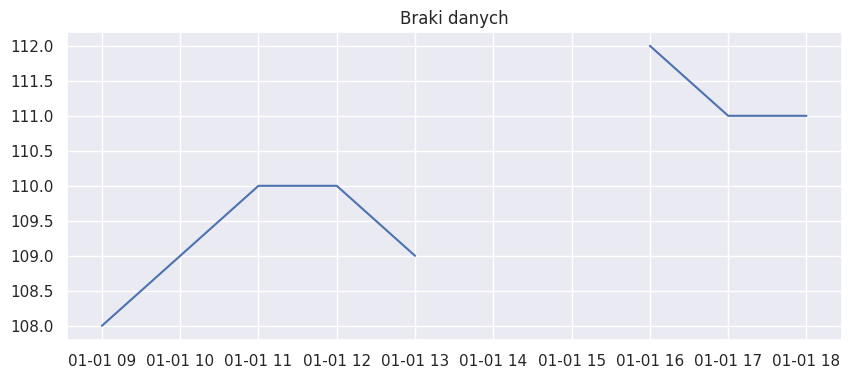

In [10]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
register_matplotlib_converters()

plt.figure(figsize=(10,4))
plt.title('Braki danych')
_ = plt.plot(df['price'])

Wypełnianie braków stałą wartością 0

In [14]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=500, height=400, title='Szeregi czasowe - braki danych - wstawienie 0')

Wypełnienie średnią

In [15]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=500, height=400, title='Szeregi czasowe - braki danych - wstawienie średniej')

Wypełnienie interpolacją

In [16]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=500, height=400, title='Szeregi czasowe - braki danych - interpolacja')

Wypełnienie ostatnie wartości forward fill

In [18]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=500, height=400, title='Szeregi czasowe - braki danych - forward fill')

<ipython-input-18-c0e2f8119589>:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Wypełnienie kolejnymi kolejnymi bfill

In [19]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=500, height=400, title='Szeregi czasowe - braki danych - forward fill')

<ipython-input-19-5b7ffe9a089e>:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

